In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# EXPLORE the DATASET

In [5]:
data.shape
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 891
Columns: 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here it can be seen that there are missing values in Embarked, Cabin, Age

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Here there are posibilites of outliers in Age and Fare column

In [8]:
data.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


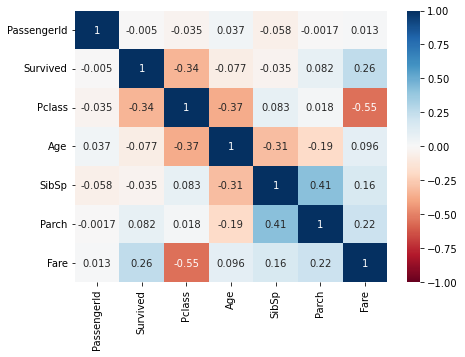

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

# Data Analysis on Survived

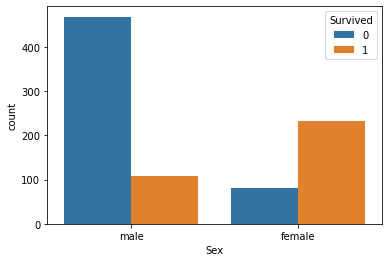

In [11]:
sns.countplot(data['Sex'], hue=data['Survived'])

plt.show()

In [12]:
data_sex = data.groupby(by=['Sex','Survived'])['Survived'].count()

In [13]:
print('Females Survived %.2f%%'%((data_sex['female'][1]/(data_sex['female'][0]+data_sex['female'][1])*100)))
print('Males Survived %.2f%%'%((data_sex['male'][1]/(data_sex['male'][0]+data_sex['male'][1])*100)))

Females Survived 74.20%
Males Survived 18.89%


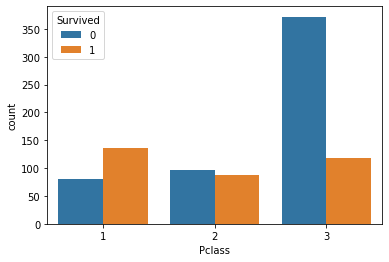

In [14]:
sns.countplot(data['Pclass'], hue=data['Survived'])

plt.show()

In [15]:
data_pclass = data.groupby(by=['Pclass','Survived'])['Survived'].count()

In [16]:
data_pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [17]:
print('1st Class Survived %.2f%%'%((data_pclass[1][1]/(data_pclass[1][0]+data_pclass[1][1])*100)))
print('2nd Class Survived %.2f%%'%((data_pclass[2][1]/(data_pclass[2][0]+data_pclass[2][1])*100)))
print('3rd Class Survived %.2f%%'%((data_pclass[3][1]/(data_pclass[3][0]+data_pclass[3][1])*100)))

1st Class Survived 62.96%
2nd Class Survived 47.28%
3rd Class Survived 24.24%


In [18]:
#Creating a function for age category
def age_category(age):
    if age<=12:
        return 'Children'
    elif age>12 and age<=18:
        return 'Teenage'
    elif age>18 and age<=30:
        return 'Youth'
    elif age>30 and age<=45:
        return 'Midage'
    elif age>45 and age<60:
        return 'Oldage'
    else:
        return 'Seniors'

In [19]:
#creating a new column
data['AgeCategory'] = data['Age'].apply(age_category)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Midage


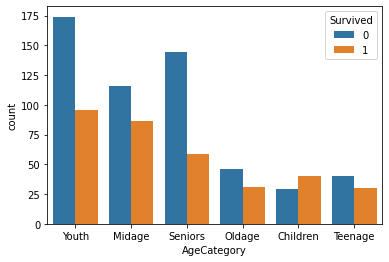

In [21]:
sns.countplot(data['AgeCategory'], hue=data['Survived'])
plt.show()

In [22]:
observed = pd.crosstab(data['AgeCategory'],data['Survived'])

In [23]:
#Chi-sq test
# H0: The Survived is Independent of Age Category
# H1: The Survived  Depends upon the Age Category
from scipy.stats import chi2_contingency

chi,p,dof,expected = chi2_contingency(observed)
print('Chi sq: ',chi)
print('p-value: ',p)
if p<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

Chi sq:  21.76819364956196
p-value:  0.0005794728331556137
Accept The H1:


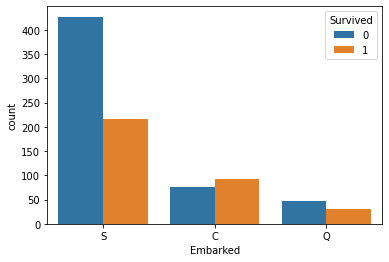

In [24]:
sns.countplot(data['Embarked'], hue=data['Survived'])
plt.show()

In [25]:
# Does the Survived Depends upon Fare Price??
fare_surv = data[data['Survived']==1]['Fare']
fare_nsurv = data[data['Survived']==0]['Fare']

In [26]:
from statsmodels.stats.weightstats import ztest

In [27]:
# H0: There is no difference in Fare of Surv and Fare of not Surv
# H1: The two samples are different

z_score,p_value = ztest(fare_surv,fare_nsurv)
print('z-score: ',z_score)
print('p-value: ',p_value)
if p_value<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

z-score:  7.939191660871055
p-value:  2.035031103573989e-15
Accept The H1:


# DATA PRE-PROCESSING

## Detect and Treat the missing Values

In [28]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
AgeCategory     0.000000
dtype: float64

In [29]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Seniors


In [30]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()[1]

Embarked
C    78.2667
Q    90.0000
S    52.0000
Name: Fare, dtype: float64

In [31]:
data['Embarked']= np.where(data['Embarked'].isnull(),'C',data['Embarked'])

In [32]:
data.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,Seniors


In [33]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory


In [34]:
# treating Age for missing value
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Seniors
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Seniors
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Seniors
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Seniors
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Seniors
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Seniors
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Seniors
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Seniors


In [35]:
data['Age'].median()

28.0

In [36]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [37]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory


In [38]:
# We need to drop the cabin column beacuse 77% data is missing

In [39]:
data.drop(columns=['Cabin'], inplace=True)

In [40]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
AgeCategory    0.0
dtype: float64

## Detecting and treating the outliers

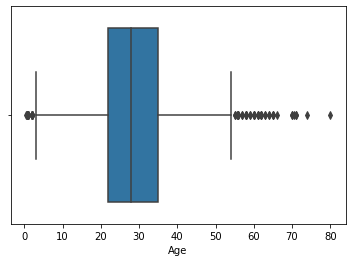

In [41]:
sns.boxplot(data['Age'])
plt.show()

In [42]:
data[data['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Seniors
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,Seniors
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,Seniors
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Seniors
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,Seniors


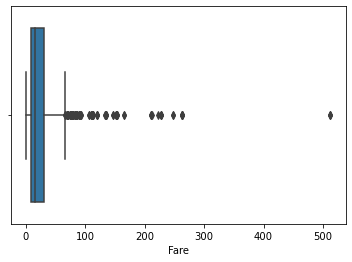

In [43]:
sns.boxplot(data['Fare'])
plt.show()

In [44]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Midage
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Midage
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Midage


In [45]:
# We will cap the values in fare to 95th percentile value
np.percentile(data['Fare'],95)

112.07915

In [46]:
ul = np.percentile(data['Fare'],95)

In [47]:
data['Fare']= np.where(data['Fare']>ul,ul,data['Fare'])

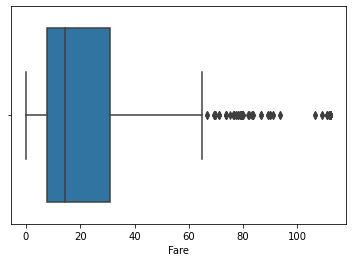

In [48]:
sns.boxplot(data['Fare'])
plt.show()

## Feature Engineering

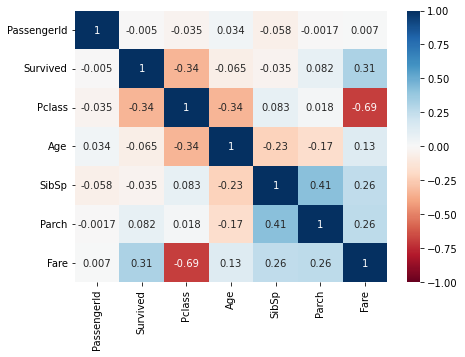

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

In [50]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.006952
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.314682
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.693945
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.132714
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.255314
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.261749
Fare,0.006952,0.314682,-0.693945,0.132714,0.255314,0.261749,1.000000


In [51]:
# To avoid multicolinearity we need to remove Pclass

In [52]:
data.drop(columns=['PassengerId','Pclass','Name','Ticket','AgeCategory'],inplace=True)

In [53]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


## Feature Selection

In [54]:
data = pd.get_dummies(data, drop_first=True)

In [55]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


## Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
data_s = sc.fit_transform(data)

In [59]:
data_s

array([[-0.78927234, -0.56573646,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 ,  0.66386103,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 , -0.25833709, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234, -0.1046374 ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -0.25833709, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.20276197, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [60]:
pd.DataFrame(data_s, columns=data.columns)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,-0.565736,0.432793,-0.473674,-0.700836,0.737695,-0.307562,0.619306
1,1.266990,0.663861,0.432793,-0.473674,1.491434,-1.355574,-0.307562,-1.614710
2,1.266990,-0.258337,-0.474545,-0.473674,-0.677726,-1.355574,-0.307562,0.619306
3,1.266990,0.433312,0.432793,-0.473674,0.868903,-1.355574,-0.307562,0.619306
4,-0.789272,0.433312,-0.474545,-0.473674,-0.673447,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.181487,-0.474545,-0.473674,-0.503976,0.737695,-0.307562,0.619306
887,1.266990,-0.796286,-0.474545,-0.473674,0.078042,-1.355574,-0.307562,0.619306
888,-0.789272,-0.104637,0.432793,2.008933,-0.146206,-1.355574,-0.307562,0.619306
889,1.266990,-0.258337,-0.474545,-0.473674,0.078042,0.737695,-0.307562,-1.614710


## Train Test Split

In [61]:
y = data['Survived']  #dependent variable
x = data.drop(columns=['Survived'])    #independent variable

In [62]:
x

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1
887,19.0,0,0,30.0000,0,0,1
888,28.0,1,2,23.4500,0,0,1
889,26.0,0,0,30.0000,1,0,0


In [63]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test, y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [66]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


## Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model_lr = LogisticRegression()

In [69]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [150]:
y_pred_lr = model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [151]:
# Creating a function for Validation

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,log_loss

In [164]:
def validation(test,pred):
    print('Confusion Matrix:\n',confusion_matrix(test,pred))
    print('Accuracy:',accuracy_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('Precision:',precision_score(test,pred))
    print('F1 Score:',f1_score(test,pred))

In [165]:
validation(y_test,y_pred_lr)

Confusion Matrix:
 [[94 16]
 [22 47]]
Accuracy: 0.7877094972067039
Recall: 0.6811594202898551
Precision: 0.746031746031746
F1 Score: 0.7121212121212122


In [166]:
#accuracy of Logistic Regression
acc_LR = round(accuracy_score(y_test,y_pred_lr)*100,2)
acc_LR

78.77

## Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

In [168]:
model_nb = GaussianNB()

In [169]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [170]:
y_pred_nb = model_nb.predict(x_test)

In [171]:
y_pred_nb

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [172]:
pd.DataFrame({'Actual Y':y_test,'Pred LR':y_pred,'Pred NB':y_pred_nb}).head(20)

,Actual Y,Pred LR,Pred NB
90,0,0,0
736,0,0,1
48,0,0,0
783,0,0,0
404,0,1,1
884,0,0,0
865,1,1,1
796,1,1,1
819,0,0,0
75,0,0,0


In [173]:
validation(y_test,y_pred_nb)

Confusion Matrix:
 [[94 16]
 [21 48]]
Accuracy: 0.7932960893854749
Recall: 0.6956521739130435
Precision: 0.75
F1 Score: 0.7218045112781954


In [268]:
#Accuracy of Gaussian naive bayes
acc_Gnb = round(accuracy_score(y_test,y_pred_nb)*100,2)
acc_Gnb

79.33

## Decision Tree

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [176]:
model_dt = DecisionTreeClassifier()

In [177]:
param = {'criterion':['gini','entropy'],
         'max_depth':[4,5,6,7,8]}

In [178]:
gscv = GridSearchCV(estimator=model_dt,
                   param_grid=param,
                   scoring='accuracy',
                   verbose=3)

In [179]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.818 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.811 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.803 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.803 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.810 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.811 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.818 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.803 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.796 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.824 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.839 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]},
             scoring='accuracy', verbose=3)

In [180]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [181]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [182]:
y_pred_dt = model_dt.predict(x_test)

In [183]:
validation(y_test,y_pred_dt)

Confusion Matrix:
 [[95 15]
 [23 46]]
Accuracy: 0.7877094972067039
Recall: 0.6666666666666666
Precision: 0.7540983606557377
F1 Score: 0.7076923076923076


In [184]:
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)
acc_dt

78.77

In [185]:
from sklearn import tree

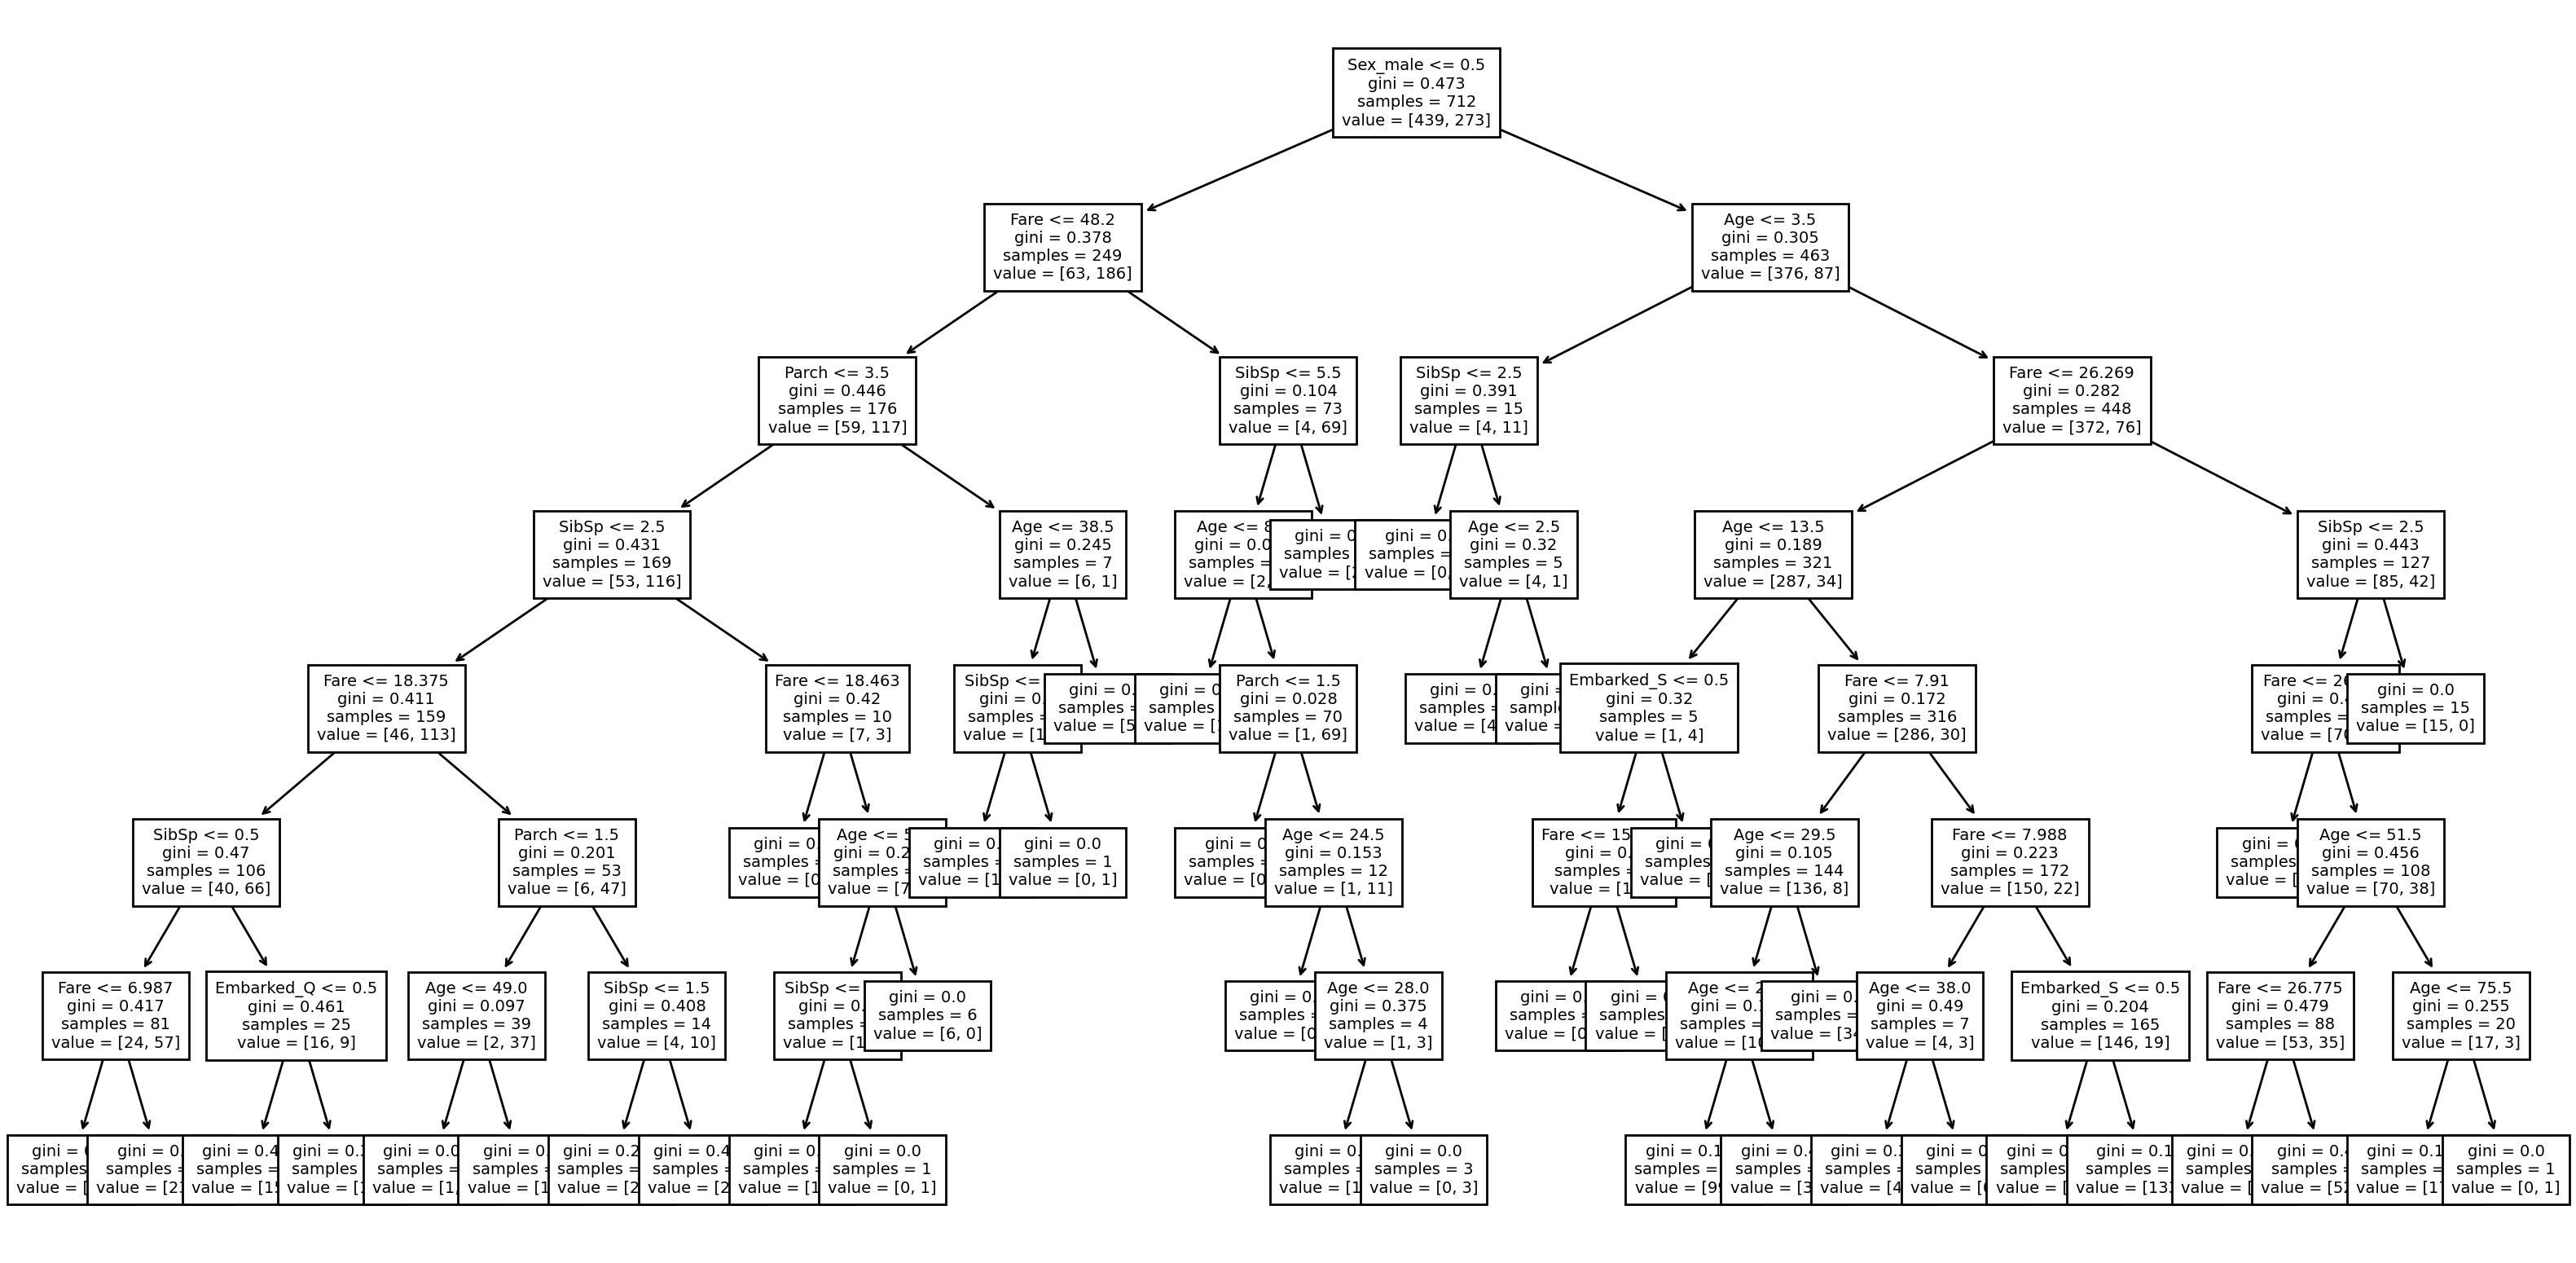

In [186]:
plt.figure(figsize=(20,10),dpi=200)
tree.plot_tree(model_dt,feature_names=x_train.columns,fontsize=7)
plt.show()

## KNN

In [330]:
from sklearn.neighbors import KNeighborsClassifier

In [344]:
model_knn = KNeighborsClassifier()

In [346]:
param = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [347]:
gscv = GridSearchCV(estimator=model_knn,
                   param_grid=param,scoring='accuracy',cv=5)

In [348]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [349]:
gscv.best_score_

0.7457500246232641

In [350]:
gscv.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [351]:
model_knn  = KNeighborsClassifier(**gscv.best_params_)

In [352]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance')

In [353]:
y_pred_knn = model_knn.predict(x_test)

In [355]:
validation(y_test,y_pred_knn)

Confusion Matrix:
 [[90 20]
 [25 44]]
Accuracy: 0.7486033519553073
Recall: 0.6376811594202898
Precision: 0.6875
F1 Score: 0.6616541353383458


In [358]:
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)
acc_knn

74.86

## SVM

In [300]:
from sklearn.svm import SVC

In [301]:
model_svc = SVC()

In [302]:
param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [303]:
gscv = GridSearchCV(estimator=model_svc,
                   param_grid=param,
                   scoring='accuracy',
                   verbose=3)

In [304]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.685 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.648 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.676 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.685 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.725 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.725 total time=   0.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [305]:
gscv.best_score_

0.7893233527036344

In [306]:
gscv.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [307]:
model_svc = SVC(**gscv.best_params_)

In [308]:
model_svc.fit(x_train,y_train)

SVC(C=1000, gamma=0.001)

In [309]:
y_pred_svc = model_svc.predict(x_test)

In [310]:
validation(y_test,y_pred_svc)

Confusion Matrix:
 [[93 17]
 [16 53]]
Accuracy: 0.8156424581005587
Recall: 0.7681159420289855
Precision: 0.7571428571428571
F1 Score: 0.762589928057554


In [312]:
acc_svc = round(accuracy_score(y_test,y_pred_svc)*100,2)
acc_svc

81.56

# Ensemble Models

## Bagging (Random Forest)

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
model_rf = RandomForestClassifier()

In [189]:
param = {'n_estimators':[50,100,200,350],
        'criterion':['gini','entropy'],
        'max_features':[3,4,5]}

In [194]:
gscv = GridSearchCV(estimator=model_rf,
                   param_grid=param,
                   cv=3,
                   scoring='accuracy',
                   verbose=3)

In [195]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.832 total time=   0.1s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.747 total time=   0.1s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.797 total time=   0.1s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.815 total time=   0.3s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.768 total time=   0.3s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.793 total time=   0.3s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.824 total time=   0.7s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.776 total time=   0.7s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.802 total time=   0.7s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=350;, score=0.819 total time=

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 350]},
             scoring='accuracy', verbose=3)

In [196]:
gscv.best_score_

0.8033424340200215

In [197]:
gscv.best_params_

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 200}

In [198]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [199]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=200)

In [200]:
y_pred_rf = model_rf.predict(x_test)

In [201]:
validation(y_test,y_pred_rf)

Confusion Matrix:
 [[95 15]
 [18 51]]
Accuracy: 0.8156424581005587
Recall: 0.7391304347826086
Precision: 0.7727272727272727
F1 Score: 0.7555555555555555


In [261]:
acc_rf =round(accuracy_score(y_test,y_pred_rf)*100,2)
acc_rf

81.56

## Boosting (ADA Boost)

In [203]:
from sklearn.ensemble import AdaBoostClassifier

In [204]:
model_ada = AdaBoostClassifier()

In [205]:
param = {'n_estimators':[50,100,200,350,500],
        'learning_rate':[0.001,0.01,0.1,1,10]}

In [206]:
gscv = GridSearchCV(estimator=model_ada,
                   param_grid=param,
                   cv=3,
                   scoring='f1',
                   verbose=3)

In [207]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=0.737 total time=   0.1s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=0.705 total time=   0.1s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=0.694 total time=   0.1s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=0.737 total time=   0.3s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=0.705 total time=   0.3s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=0.694 total time=   0.3s
[CV 1/3] END learning_rate=0.001, n_estimators=200;, score=0.737 total time=   0.7s
[CV 2/3] END learning_rate=0.001, n_estimators=200;, score=0.705 total time=   0.7s
[CV 3/3] END learning_rate=0.001, n_estimators=200;, score=0.694 total time=   0.7s
[CV 1/3] END learning_rate=0.001, n_estimators=350;, score=0.737 total time=   1.2s
[CV 2/3] END learning_rate=0.001, n_estimators=350;, score=0.705 total time=   1.3s
[CV 3/3] END learn

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [208]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [209]:
gscv.best_score_

0.7406646725087068

In [210]:
gscv.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [211]:
model_ada = AdaBoostClassifier(**gscv.best_params_)

In [212]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [213]:
y_pred_ada = model_ada.predict(x_test)

In [214]:
validation(y_test,y_pred_ada)

Confusion Matrix:
 [[94 16]
 [17 52]]
Accuracy: 0.8156424581005587
Recall: 0.7536231884057971
Precision: 0.7647058823529411
F1 Score: 0.759124087591241


In [216]:
acc_ada = round(accuracy_score(y_test,y_pred_ada)*100,2)
acc_ada

81.56

## Gradient Boosting

In [249]:
from sklearn.ensemble import GradientBoostingClassifier

In [250]:
model_gb = GradientBoostingClassifier()

In [251]:
params = {'n_estimators':[50,100,200,350,500],
         'learning_rate':[0.001,0.01,0.1,1],
         'max_features':[3,4,5]}

In [252]:
gscv = GridSearchCV(estimator=model_gb,
                   param_grid=params,
                   cv=3,
                   scoring='accuracy',
                   verbose=3)

In [253]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END learning_rate=0.001, max_features=3, n_estimators=50;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=3, n_estimators=50;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=3, n_estimators=50;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_features=3, n_estimators=100;, score=0.618 total time=   0.1s
[CV 2/3] END learning_rate=0.001, max_features=3, n_estimators=100;, score=0.616 total time=   0.1s
[CV 3/3] END learning_rate=0.001, max_features=3, n_estimators=100;, score=0.616 total time=   0.1s
[CV 1/3] END learning_rate=0.001, max_features=3, n_estimators=200;, score=0.618 total time=   0.2s
[CV 2/3] END learning_rate=0.001, max_features=3, n_estimators=200;, score=0.616 total time=   0.2s
[CV 3/3] END learning_rate=0.001, max_features=3, n_estimators=200;, score=0.616 total time=   0.2s
[CV 1/3] END learning_rate=0.001, max_fea

[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=200;, score=0.793 total time=   0.3s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=200;, score=0.793 total time=   0.3s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=350;, score=0.824 total time=   0.5s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=350;, score=0.785 total time=   0.5s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=350;, score=0.806 total time=   0.5s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=500;, score=0.803 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=500;, score=0.789 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_features=3, n_estimators=50;, score=0.824 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_features=3, n_estimators=50;, score=0.785 total time=   0.0s
[CV 3/3] END l

[CV 1/3] END learning_rate=1, max_features=5, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=100;, score=0.785 total time=   0.1s
[CV 3/3] END learning_rate=1, max_features=5, n_estimators=100;, score=0.772 total time=   0.1s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=200;, score=0.769 total time=   0.3s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=200;, score=0.722 total time=   0.3s
[CV 3/3] END learning_rate=1, max_features=5, n_estimators=200;, score=0.781 total time=   0.3s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=350;, score=0.782 total time=   0.5s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=350;, score=0.785 total time=   0.5s
[CV 3/3] END learning_rate=1, max_features=5, n_estimators=350;, score=0.768 total time=   0.5s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=500;, score=0.803 total time=   0.8s
[CV 2/3] END learning_rate=1, max_featur

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 200, 350, 500]},
             scoring='accuracy', verbose=3)

In [254]:
gscv.best_score_

0.8061612830786323

In [255]:
gscv.best_params_

{'learning_rate': 0.1, 'max_features': 4, 'n_estimators': 50}

In [256]:
model_gb = GradientBoostingClassifier(**gscv.best_params_)

In [257]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(max_features=4, n_estimators=50)

In [258]:
y_pred_gb = model_gb.predict(x_test)

In [259]:
validation(y_test,y_pred_gb)

Confusion Matrix:
 [[98 12]
 [19 50]]
Accuracy: 0.8268156424581006
Recall: 0.7246376811594203
Precision: 0.8064516129032258
F1 Score: 0.7633587786259542


In [262]:
acc_gb =round(accuracy_score(y_test,y_pred_gb)*100,2)
acc_gb

82.68

## XGBoost

In [228]:
from xgboost import XGBClassifier

In [229]:
model_xgb = XGBClassifier(eval_metric = 'logloss')

In [230]:
params = {'n_estimators':[50,100,200,350,500],
         'learning_rate':[0.001,0.01,0.1,1],
         'max_depth':[4,5,6,7]}

In [231]:
gscv = GridSearchCV(estimator=model_xgb,
                   param_grid=params,
                   cv=3,
                   scoring='accuracy',
                   verbose=3)

In [232]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.776 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.797 total time=   0.1s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.776 total time=   0.1s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.819 total time=   0.3s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.797 total time=   0.4s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.781 total time=   0.3s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=350;, sc

[CV 2/3] END learning_rate=0.01, max_depth=5, n_estimators=350;, score=0.793 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=5, n_estimators=350;, score=0.785 total time=   0.7s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.819 total time=   1.1s
[CV 2/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.781 total time=   1.1s
[CV 3/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.785 total time=   1.1s
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=50;, score=0.773 total time=   0.1s
[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=50;, score=0.797 total time=   0.1s
[CV 3/3] END learning_rate=0.01, max_depth=6, n_estimators=50;, score=0.793 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.815 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.793 total time=   0.2s
[CV 3/3] END learning_rate=0.01, max_depth=

[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.789 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.755 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=350;, score=0.790 total time=   0.9s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=350;, score=0.793 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=350;, score=0.747 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.786 total time=   1.1s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.789 total time=   1.2s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.747 total time=   1.2s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.807 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.806 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 200, 350, 500]},
             scoring='accuracy', verbose=3)

In [233]:
gscv.best_score_

0.8117930716590434

In [234]:
gscv.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50}

In [235]:
model_xgb = XGBClassifier(**gscv.best_params_)

In [236]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [237]:
y_pred_xgb = model_xgb.predict(x_test)

In [238]:
validation(y_test,y_pred_xgb)

Confusion Matrix:
 [[97 13]
 [17 52]]
Accuracy: 0.8324022346368715
Recall: 0.7536231884057971
Precision: 0.8
F1 Score: 0.7761194029850746


In [240]:
acc_xg = round(accuracy_score(y_test,y_pred_xgb)*100,2)
acc_xg

83.24

In [360]:
Models_accuracy = pd.DataFrame({"Models" :["Logistic Regression","Gaussian Naive Bayes","Decision Tree","KNN","SVC","Random Forest","Ada Boosting",
                         "Gradient Boosting","XG Boosting"],
              
              "Accuracy" : [acc_LR,acc_Gnb,acc_dt,acc_knn,acc_svc,acc_rf,acc_ada,acc_gb,acc_xg]})

Models_accuracy

,Models,Accuracy
0,Logistic Regression,78.77
1,Gaussian Naive Bayes,79.33
2,Decision Tree,78.77
3,KNN,74.86
4,SVC,81.56
5,Random Forest,81.56
6,Ada Boosting,81.56
7,Gradient Boosting,82.68
8,XG Boosting,83.24
